In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

cusdata = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/Churn_Modelling_Valid.csv?raw=True')
cusdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# create a df of categorical data
cusd_categorical = cusdata[['Geography','Gender','Exited']]
cusd_categorical

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


0 Geography
1 Gender


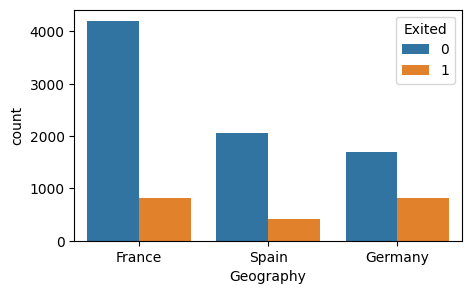

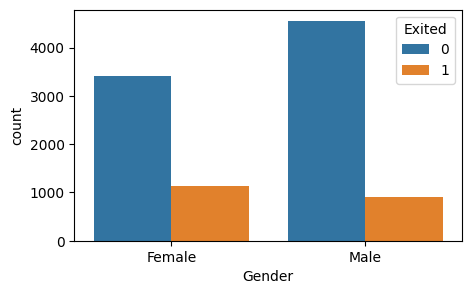

In [13]:
#for i,predictor in enumerate(cusd_categorical):
for i,predictor in enumerate(cusd_categorical.drop(columns=['Exited'])):
    print(i,predictor)
    plt.figure(figsize=(5,3))
    sns.countplot(data = cusd_categorical, x=predictor,hue='Exited')

<Axes: xlabel='Gender', ylabel='Count'>

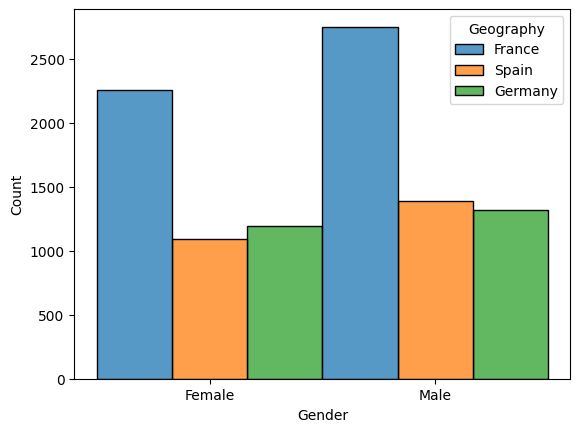

In [14]:
#bivarite analysis 

sns.histplot(x='Gender',hue='Geography',data=cusd_categorical,multiple='dodge')

In [15]:
cusd_Exitedactive = cusd_categorical.loc[cusd_categorical['Exited']==1]
cusd_Exitedactive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  2037 non-null   object
 1   Gender     2037 non-null   object
 2   Exited     2037 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 63.7+ KB


<Axes: xlabel='Gender', ylabel='Count'>

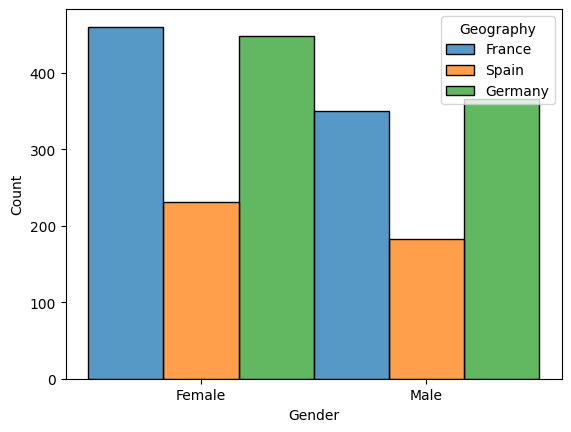

In [16]:
#histplot for the churned customers 
#compare the below visual with the total customers 
sns.histplot(x='Gender',hue='Geography',data=cusd_Exitedactive,multiple='dodge')

<Axes: >

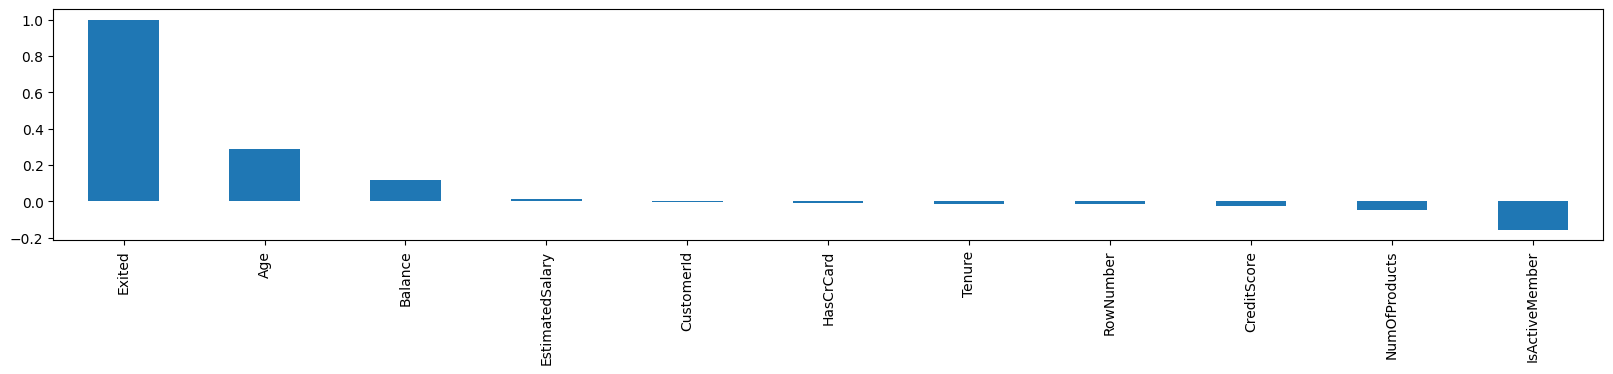

In [22]:
#prepare the barchart for only exited column 
plt.figure(figsize=(20,3))
cusdata.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

In [17]:
#Numerical analysis using the corelation method 
numeric_data = cusdata.select_dtypes(include=['number'])
numeric_data.corr()
#cusdata.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [21]:
cusdata.corr(numeric_only=True)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

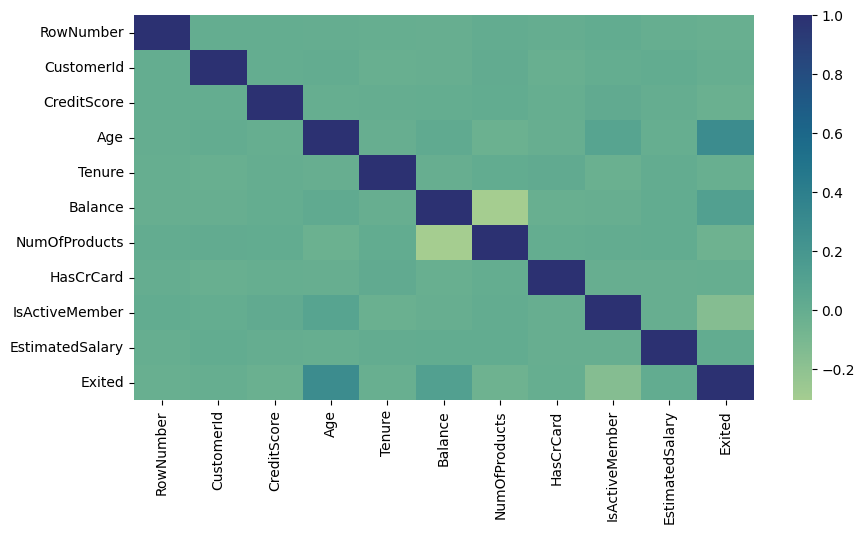

In [26]:
#use the correlation method to generate the heat map 
plt.figure(figsize=(10,5))
sns.heatmap(cusdata.corr(numeric_only=True),cmap='crest')


In [30]:
import plotly.express as px
plt.figure(figsize=(10,5))
fig =px.imshow(cusdata.corr(numeric_only=True),text_auto=True)
fig.show()

<Figure size 1000x500 with 0 Axes>